<a href="https://colab.research.google.com/github/enyeneraph/AVIATION-AIRPLANE-FLIGHTS/blob/main/Premiere_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary packages**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [104]:
airplane_dataset = pd.read_csv('https://raw.githubusercontent.com/enyeneraph/AVIATION-AIRPLANE-FLIGHTS/main/Airplane_crashes_dataset_since_1908.csv', parse_dates= ['date'])


In [105]:
airplane_dataset.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [106]:
airplane_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  5008 non-null   datetime64[ns]
 1   time                  5008 non-null   object        
 2   location              5008 non-null   object        
 3   operator              5008 non-null   object        
 4   flight_no             5008 non-null   object        
 5   route                 5008 non-null   object        
 6   ac_type               5008 non-null   object        
 7   registration          5008 non-null   object        
 8   cn_ln                 5008 non-null   object        
 9   all_aboard            5008 non-null   object        
 10  passengers_aboard     5008 non-null   object        
 11  crew_aboard           5008 non-null   object        
 12  all_fatalities        5008 non-null   object        
 13  passenger_fataliti

In [107]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### **Data Cleaning**

Inspecting the dataset

In [108]:
airplane_dataset.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Dropping columns that are unnecessary to ur analysis

In [109]:
airplane_dataset.drop(columns=['registration', 'flight_no', 'cn_ln', 'time', 'route'], inplace=True)


Replacing '?' in the dataset with np.nan

In [110]:
airplane_dataset = airplane_dataset.replace({'?': np.nan})


Checking for null values

In [111]:
airplane_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  5008 non-null   datetime64[ns]
 1   location              5003 non-null   object        
 2   operator              4998 non-null   object        
 3   ac_type               4995 non-null   object        
 4   all_aboard            4991 non-null   object        
 5   passengers_aboard     4787 non-null   object        
 6   crew_aboard           4789 non-null   object        
 7   all_fatalities        5000 non-null   object        
 8   passenger_fatalities  4773 non-null   object        
 9   crew_fatalities       4773 non-null   object        
 10  ground                4964 non-null   object        
 11  summary               4949 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 469.6+ KB


In [112]:
airplane_dataset.isna().sum()

date                      0
location                  5
operator                 10
ac_type                  13
all_aboard               17
passengers_aboard       221
crew_aboard             219
all_fatalities            8
passenger_fatalities    235
crew_fatalities         235
ground                   44
summary                  59
dtype: int64

Dealing with inconsistent values

In [113]:
#cleaning the operator column
airplane_dataset['operator'].replace({'Military -Royal Air Force':'Military - Royal Air Force'}, inplace= True)

In [114]:
#capitalize so as to remove duplicates when plotting
airplane_dataset["ac_type"] = airplane_dataset.ac_type.str.upper()
airplane_dataset["operator"] = airplane_dataset.operator.str.upper()
airplane_dataset["location"] = airplane_dataset.location.str.upper()

## **Feature engineering**

Extracting year, month and day from dates

In [115]:
#extracting years from dates
airplane_dataset['year'] = airplane_dataset['date'].dt.year

In [116]:
#extracting months from dates
airplane_dataset['month'] = airplane_dataset['date'].dt.month

In [117]:
#extracting days from dates
airplane_dataset['day'] = airplane_dataset['date'].dt.dayofweek

In [118]:
#obtaining seasons from months
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

airplane_dataset['season'] = airplane_dataset['month'].apply(get_season)

Splitting operators into military and private

In [119]:
#splitting operators into military and private
airplane_dataset['military_private'] = airplane_dataset['operator'].str.contains('MILITARY')
airplane_dataset['military_private'] = airplane_dataset['military_private'].replace(True, 'military')
airplane_dataset['military_private'] = airplane_dataset['military_private'].replace(False, 'private')

Grouping days as weekday vs weekend

In [120]:
airplane_dataset['day'].value_counts()

1    761
2    754
3    752
4    746
5    721
0    677
6    597
Name: day, dtype: int64

In [121]:
#splitting days into weekday and weekend
weekend = [5, 0]
airplane_dataset['weekday_weekend'] = airplane_dataset['day'].isin(weekend)
airplane_dataset['weekday_weekend'] = airplane_dataset['weekday_weekend'].replace(True, 'Weekend')
airplane_dataset['weekday_weekend'] = airplane_dataset['weekday_weekend'].replace(False, 'Weekday')


Extracing country from location

In [122]:
def split_country(x):
  a = x.split(",")[-1].strip()

  return a

In [123]:
airplane_dataset['country'] = airplane_dataset[airplane_dataset['location'].notna()]['location'].apply(split_country)

In [124]:
#defining US states and capitals
us_regions = ['Alabama', 'Montgomery', 'Alaska','Juneau', 'Arizona', 'Phoenix', 'Arkansas', 'Little Rock', 'California', 'Sacremento','Colorado', 'Denver', 'Connecticut', 'Hartford','Delaware', 'Dover',
'Florida', 'Tallahassee','Georgia', 'Atlanta', 'Hawaii','Honolulu', 'Idaho', 'Boise','Illinois', 'Springfield', 'Indiana', 'Indianapolis', 'Iowa', 'Des Moines', 'Kansas', 'Topeka', 'Kentucky', 'Frankfort', 'Louisiana', 'Baton Rouge',
'Maine', 'Augusta','Maryland', 'Annapolis','Massachusetts', 'Boston','Michigan', 'Lansing', 'Minnesota', 'St. Paul', 'Mississippi', 'Jackson', 'Missouri', 'Jefferson City',
'Montana', 'Helena', 'Nebraska', 'Lincoln', 'Nevada', 'Carson City', 'New Hampshire', 'Concord', 'New Jersey', 'Trenton', 'New Mexico', 'Santa Fe', 'New York', 'Albany','North Carolina', 'Raleigh',
'North Dakota', 'Bismarck', 'Ohio', 'Columbus','Oklahoma', 'Oklahoma City','Oregon', 'Salem','Pennsylvania', 'Harrisburg','Rhode Island', 'Providence','South Carolina', 'Columbia','South Dakota',    'Pierre',
'Tennessee', 'Nashville','Texas', 'Austin', 'Utah', 'Salt Lake City', 'Vermont' , 'Montpelier', 'Virginia', 'Richmond', 'Washington', 'Olympia', 'West Virginia', 'Charleston', 'Wisconsin', 'Madison',
'Wyoming', 'Cheyenne']
us_regions = [i.upper() for i in us_regions]
us_regions


['ALABAMA',
 'MONTGOMERY',
 'ALASKA',
 'JUNEAU',
 'ARIZONA',
 'PHOENIX',
 'ARKANSAS',
 'LITTLE ROCK',
 'CALIFORNIA',
 'SACREMENTO',
 'COLORADO',
 'DENVER',
 'CONNECTICUT',
 'HARTFORD',
 'DELAWARE',
 'DOVER',
 'FLORIDA',
 'TALLAHASSEE',
 'GEORGIA',
 'ATLANTA',
 'HAWAII',
 'HONOLULU',
 'IDAHO',
 'BOISE',
 'ILLINOIS',
 'SPRINGFIELD',
 'INDIANA',
 'INDIANAPOLIS',
 'IOWA',
 'DES MOINES',
 'KANSAS',
 'TOPEKA',
 'KENTUCKY',
 'FRANKFORT',
 'LOUISIANA',
 'BATON ROUGE',
 'MAINE',
 'AUGUSTA',
 'MARYLAND',
 'ANNAPOLIS',
 'MASSACHUSETTS',
 'BOSTON',
 'MICHIGAN',
 'LANSING',
 'MINNESOTA',
 'ST. PAUL',
 'MISSISSIPPI',
 'JACKSON',
 'MISSOURI',
 'JEFFERSON CITY',
 'MONTANA',
 'HELENA',
 'NEBRASKA',
 'LINCOLN',
 'NEVADA',
 'CARSON CITY',
 'NEW HAMPSHIRE',
 'CONCORD',
 'NEW JERSEY',
 'TRENTON',
 'NEW MEXICO',
 'SANTA FE',
 'NEW YORK',
 'ALBANY',
 'NORTH CAROLINA',
 'RALEIGH',
 'NORTH DAKOTA',
 'BISMARCK',
 'OHIO',
 'COLUMBUS',
 'OKLAHOMA',
 'OKLAHOMA CITY',
 'OREGON',
 'SALEM',
 'PENNSYLVANIA',
 'HARRISB

In [125]:
#defining canada states and capital
canada_regions = ['Alberta	Edmonton','British Columbia','Victoria', 'Manitoba', 'Winnipeg', 'Brunswick',	'New Brunswick'	'Fredericton', 'Newfoundland and Labrador', "St. John's"
'Northwest Territories', 'Yellowknife','Nova Scotia','Halifax', 'Nunavut',	'Iqaluit', 'Ontario', 'Toronto', 'Prince Edward Island',	'Charlottetown', 'Quebec',	'Québec City','Saskatchewan','Regina',
'Yukon',	'Whitehorse']

canada_regions = [i.upper() for i in canada_regions]

In [126]:
#replacing states and capitals of USA in the dataset with 'USA'
airplane_dataset['country'].replace(us_regions, 'USA', inplace=True)

In [127]:
#replacing canada states/capitals with Canada
airplane_dataset['country'].replace(canada_regions, 'CANADA', inplace = True)


## **Exploratory Data Analysis and Visualizations**

**Growth rate of accidents from 1908 to 2021**

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Count of accidents per year')]

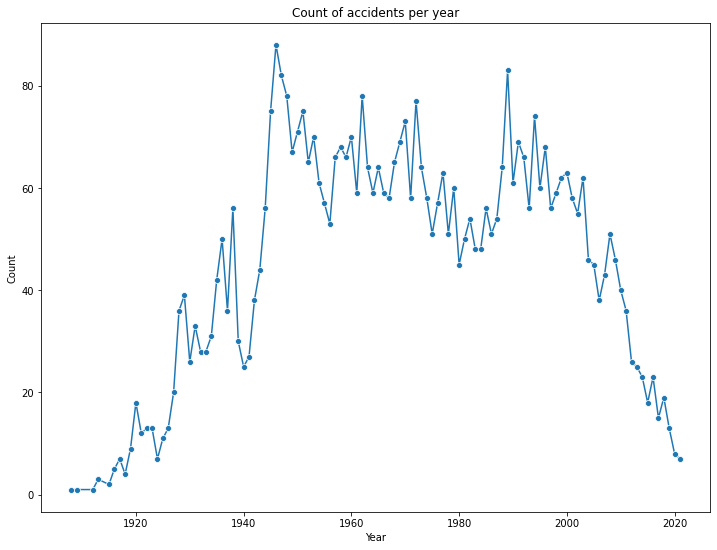

In [128]:
#no accidents by year
df = airplane_dataset.groupby('year')['date'].count().reset_index()
plt.figure(figsize=(12,9))
g = sns.lineplot(data=df,x = 'year', y= 'date', marker='o')
g.set( xlabel = "Year", ylabel = "Count", title= 'Count of accidents per year')


Inferences/Insights:


**Countries with the most accidents from 2000 to 2021**

In [129]:
#countries with the most accidents from 200o to 2021
dataset_from_last_21years = airplane_dataset[airplane_dataset['year'].between(2000, 2021)]
dataset_from_last_21years= dataset_from_last_21years.groupby('country')['year'].count().reset_index().nlargest(n= 10, columns= 'year')


Text(0.5, 1.0, 'Top 10 countries with the most accidents in 2000-2021')

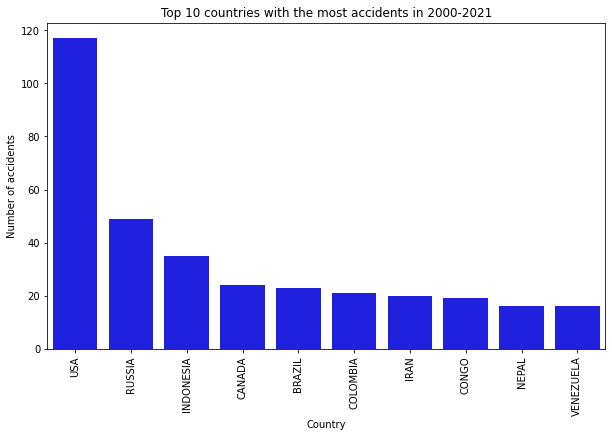

In [130]:
#plotting the bar chart
plt.figure(figsize= (10, 6))
plt.xticks(rotation= 90)
sns.barplot(x='country', y= 'year', data= dataset_from_last_21years, color='blue')
plt.xlabel('Country')
plt.ylabel('Number of accidents')
plt.title('Top 10 countries with the most accidents in 2000-2021')

Observations/Insights:

**Number of accidents per month**

[Text(0, 0.5, 'Count'),
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')],
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Count of accidents per month')]

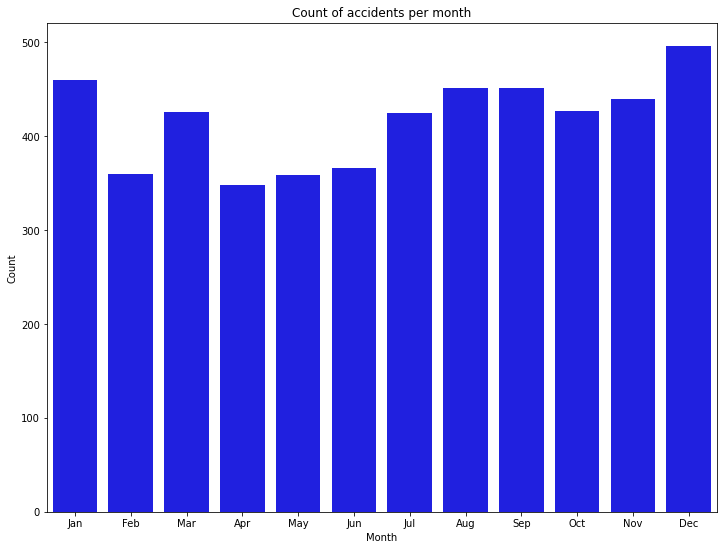

In [131]:
#no accidents by month
df = airplane_dataset.groupby('month')['date'].count().reset_index()
plt.figure(figsize=(12,9))
g = sns.barplot(x = 'month', y= 'date', data = df, color= 'blue')
g.set( xlabel = "Month", ylabel = "Count", title= 'Count of accidents per month', xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

Inferences/Insights:


**Number of accidents by season**

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Seasons'),
 Text(0.5, 1.0, 'Count of accidents per season')]

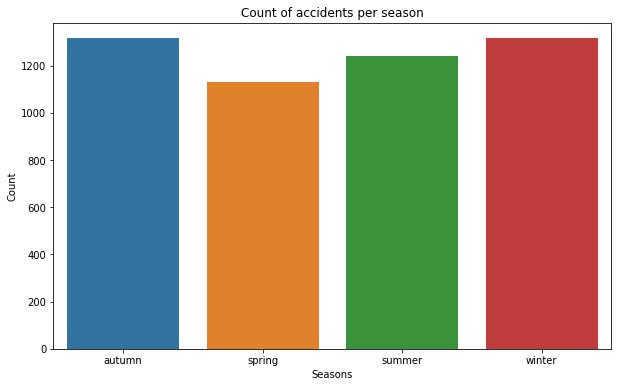

In [132]:
#no accidents by season
df = airplane_dataset.groupby('season')['date'].count().reset_index()
plt.figure(figsize=(10,6))
g = sns.barplot(x = 'season', y= 'date', data = df)
g.set( xlabel = "Seasons", ylabel = "Count", title= 'Count of accidents per season')

Inferences/Insights:


**Number of accidents by day of week**


[Text(0, 0.5, 'Count'),
 [Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday'),
  Text(0, 0, 'Sunday')],
 Text(0.5, 0, 'Day of the Week'),
 Text(0.5, 1.0, 'Count of accidents per day')]

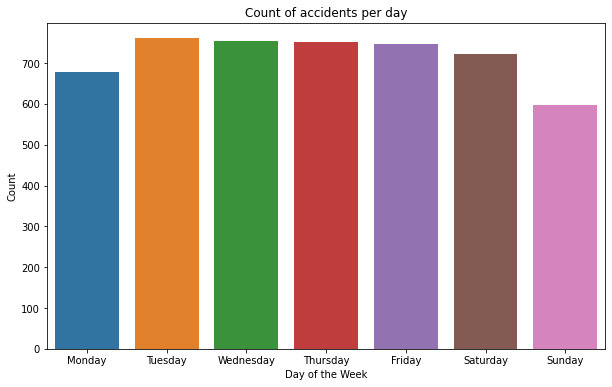

In [133]:
#no of accident by day of the week
df = airplane_dataset.groupby('day')['date'].count().reset_index()
plt.figure(figsize=(10,6))
g = sns.barplot(x = 'day', y= 'date', data = df)
g.set( xlabel = "Day of the Week", ylabel = "Count", title= 'Count of accidents per day', xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Inferences/Insights:


**Proportion of accidents in weekday and workday**


In [134]:
#no of accident by weekend/weekday 
df = airplane_dataset.groupby('weekday_weekend')['date'].count().reset_index()
df.head()

,weekday_weekend,date
0,Weekday,3610
1,Weekend,1398


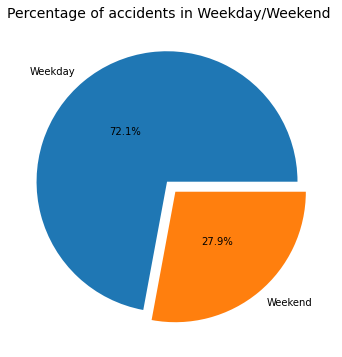

In [135]:
#accidents by weekday vs weekend
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Weekday','Weekend']
plt.pie(x=df['date'], autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of accidents in Weekday/Weekend ", fontsize=14);


Inferences/Insights:


**Number of accidents by aircraft type**

In [136]:
#no of accidents by aircraft type
accidents_by_actype = airplane_dataset.groupby('ac_type')['date'].count().reset_index()


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Aircraft_type'),
 Text(0.5, 1.0, 'Aircrafts with the most accidents(top ten)')]

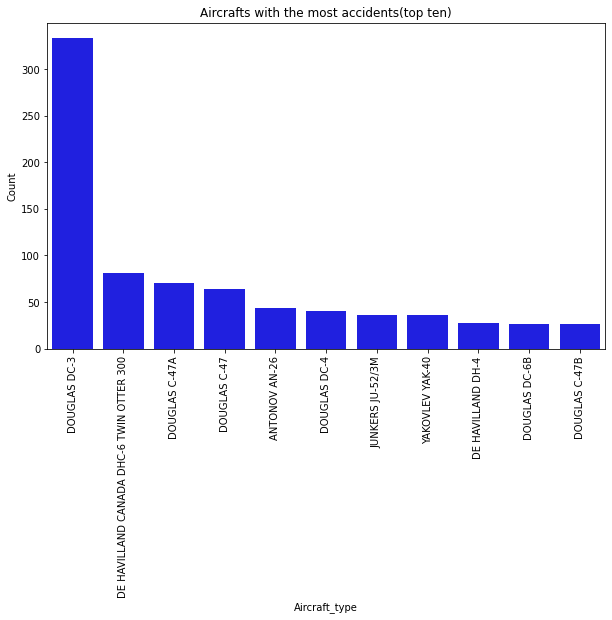

In [137]:
accidents_by_actype = accidents_by_actype.sort_values(by=['date'], ascending=False)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
g = sns.barplot(x = 'ac_type', y= 'date', data = accidents_by_actype[:11], color= 'blue')
g.set( xlabel = "Aircraft_type", ylabel = "Count", title= 'Aircrafts with the most accidents(top ten)')


Inferences/Insights:


**Aircraft operators with the most accidents**

In [138]:
#top 10 operators with the most accidents
accidents_by_operator = airplane_dataset.groupby('operator')['date'].count().reset_index()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Operator'),
 Text(0.5, 1.0, 'Count of accidents( Top ten operators)')]

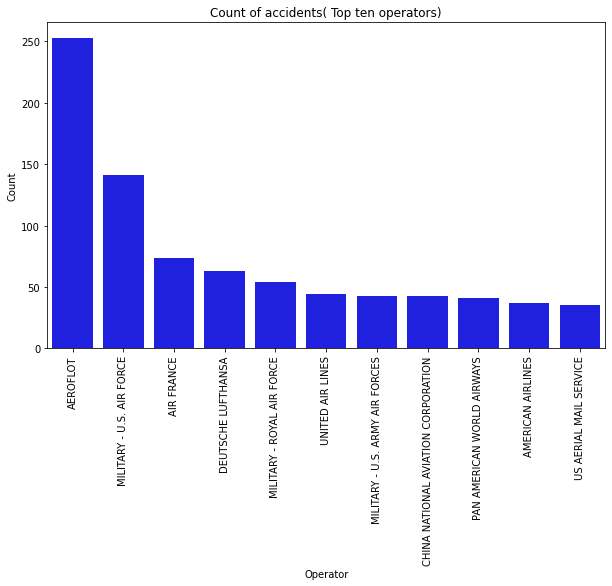

In [139]:
accidents_by_operator = accidents_by_operator.sort_values(by=['date'], ascending=False)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
g = sns.barplot(x = 'operator', y= 'date', data = accidents_by_operator[:11], color='blue')
g.set( xlabel = "Operator", ylabel = "Count", title= 'Count of accidents( Top ten operators)')

Inferences/Insights:


**Percentage of accidents by military/private operator**


In [140]:
#no of accident by military/private operator
df = airplane_dataset.groupby('military_private')['date'].count().reset_index()
df.head()

,military_private,date
0,military,762
1,private,4236


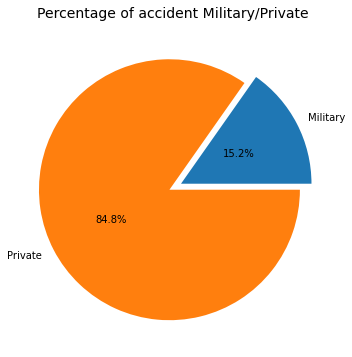

In [141]:
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Military','Private']
plt.pie(x=df['date'], autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of accident Military/Private ", fontsize=14);

Inferences/Insights:


**Top 15 countries based on fatalities per crash**


In [143]:
airplane_dataset["all_fatalities"] = pd.to_numeric(airplane_dataset["all_fatalities"], downcast="float")

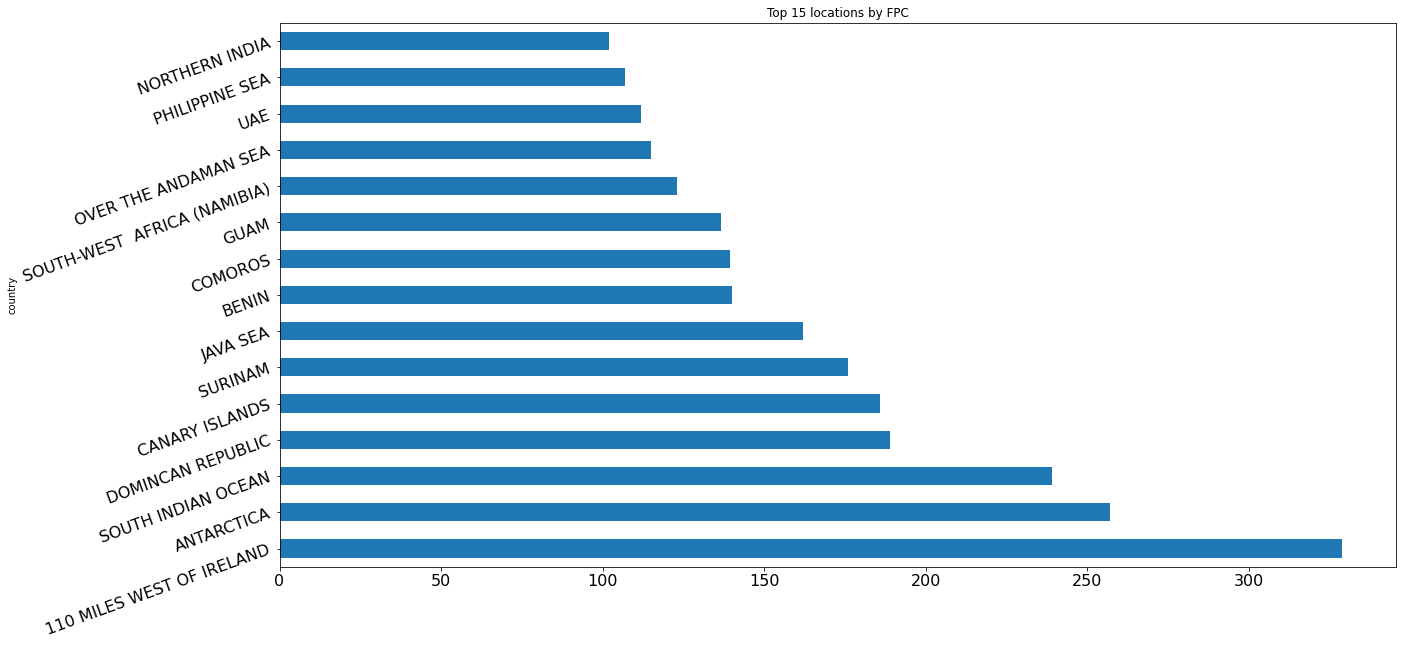

In [146]:
airplane_dataset.groupby(['country'], sort=True)['all_fatalities'].mean().sort_values(ascending=False)[:15].plot(kind='barh', figsize=(20,10), rot=20, fontsize=16, title="Top 15 locations by FPC")

Insight/Observation:

**Proportion of fatalities to people aboard**


In [147]:

df = airplane_dataset.copy()
df['all_fatalities'] = df['all_fatalities'].replace(np.nan, '0')
df['all_aboard'] = df['all_aboard'].replace(np.nan, '0')
df['all_fatalities'] = df['all_fatalities'].astype(int)
df['all_aboard'] = df['all_aboard'].astype(int)
df = df.groupby(['year']).agg({"all_aboard":"sum","all_fatalities":"sum"}).reset_index()


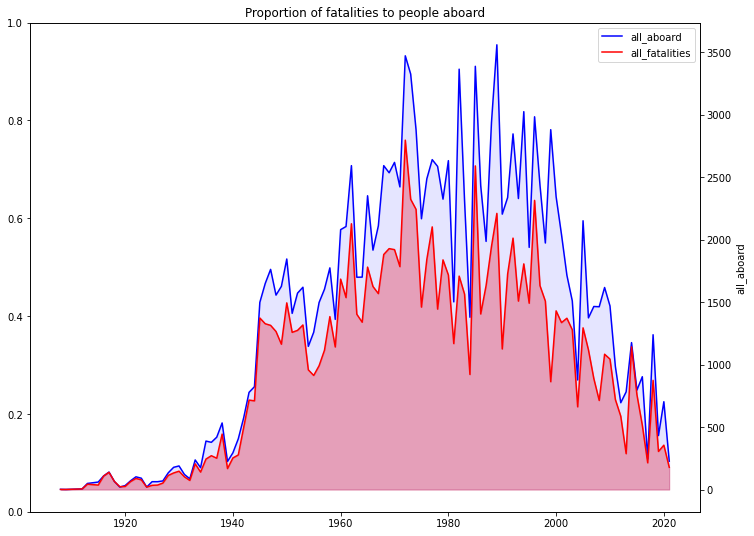

In [148]:
#plotting the graph

plt.figure(figsize=(12,9))
g2 = plt.twinx()
sns.lineplot(data = df, x = df['year'], y = df['all_aboard'] ,color="b")

sns.lineplot(data = df, x = df['year'], y = df['all_fatalities'] ,color="r", ax = g2)
plt.legend(labels=['all_aboard','all_fatalities'])
g2.set(  title= 'Proportion of fatalities to people aboard')
plt.fill_between(df['year'], df['all_fatalities'], color="red", alpha=0.3)
plt.fill_between(df['year'], df['all_aboard'], color="blue", alpha=0.1)
plt.show()


Insight/Observation: